In [113]:
import jax 
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
jax_enable_x64 = True


In [114]:
#parametros

a = 1 
b = 1
d = 1
g = 1

#condicoes iniciais 

x0 = 2.0
y0 = 1.0

#tempo  passo de tempo
tf = 20 #tempo final 
h = 0.01 #passo de tempo 
t = jnp.arange(0, tf, h) #array com os pontos de tempo


In [115]:
@jax.jit
def sistemaDeEquacoes(estado):
    x, y = estado
    dxdt = a*x - b*y*x #presa
    dydt = d*x*y - g*y #predador
    return jnp.array([dxdt, dydt])

In [116]:

def metodoDeNewton(f, x0, Jac, maxit=10):
    x = jnp.asarray(x0)
    for i in range(maxit):
        fx = f(x, x0, h)
        delta = jnp.linalg.solve(Jac, -fx)
        x = x + delta
        if(jnp.linalg.norm(delta) < 1e-6):
            break
    return x
       

In [117]:
mn_jit = jax.jit(metodoDeNewton,static_argnames=['f'])

In [118]:
@jax.jit
def residuo(yk, yanterior,h):
    return yk - yanterior - h * sistemaDeEquacoes(yk)

In [119]:

def metodoDeEulerImplicito(sistema, y0, t, h):
    n = len(t)
    y = jnp.zeros((n, len(y0)))
    #y[0] = y0

    y = y.at[0].set(y0)

    J = jax.jacrev(residuo, argnums=0)(y0,y0,h)


    for i in range(n-1):
        yanterior =  jnp.array(y[i]) #convertendo o array numpy para array jax
        #def funcao(yk):
        #    return yk - yanterior - h * sistema(yk)

        yproximo = metodoDeNewton(residuo, yanterior, J)

        #y[i+1] = jnp.array(yproximo) #convertendo de volta para numpy 
        y = y.at[i+1].set(jnp.array(yproximo))
    return y

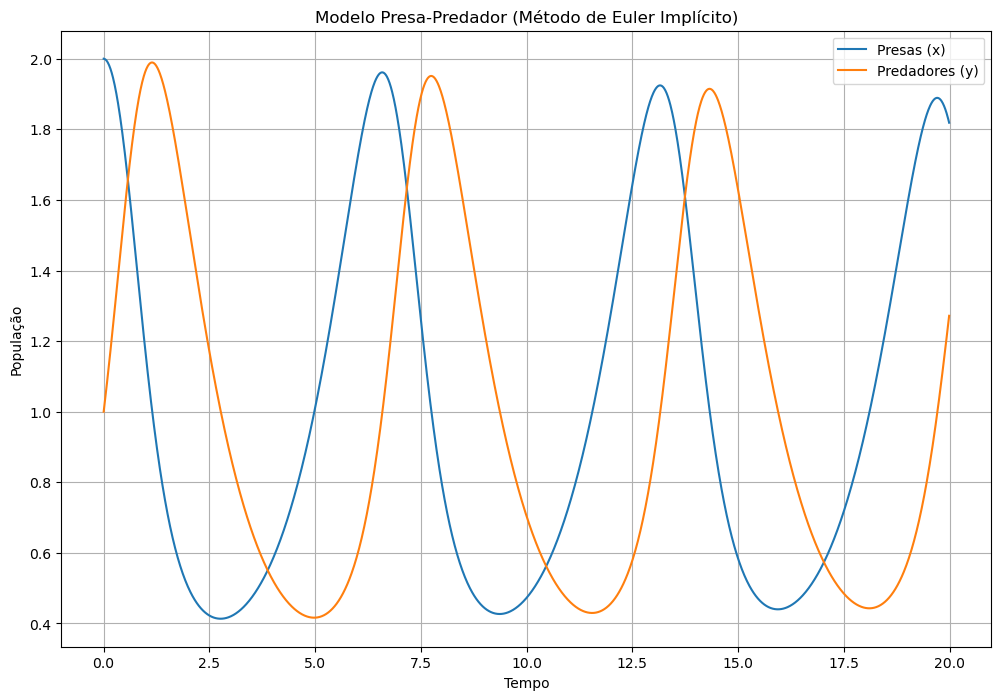

In [128]:

ci = jnp.array([x0, y0]) #condicoes iniciais como array jax

solucao = metodoDeEulerImplicito(sistemaDeEquacoes, ci, t, h)


plt.figure(figsize=(12,8))
plt.grid(True)


plt.plot(t, solucao[:,0], label='Presas (x)') 
plt.plot(t, solucao[:,1], label='Predadores (y)') 

plt.legend()
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo Presa-Predador (Método de Euler Implícito)')
plt.show()